Running SPYDERMESH as the main code:
stretching
List of indices for polygon vertices
[0, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 2, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[[2, 1, 0, 41, 2]]
stretching
List of indices for polygon vertices
[0, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 2, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[[2, 1, 0, 41, 2]]
stretching
List of indices for polygon vertices
[0, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 2, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


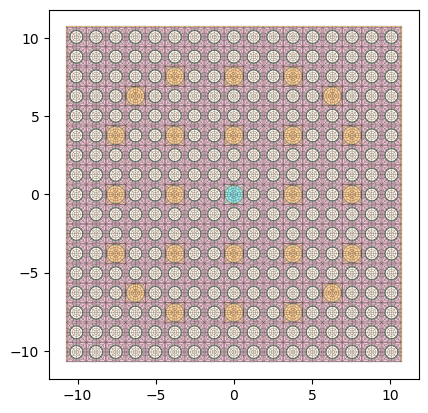

Asum error= 1.9383605831535533e-11
[10 10 10 ... 10 10 10] 33600


In [3]:
def generate_full_set(GT):
    return list(set((x[0], x[1]) for x in GT + [(x[0], 16 - x[1]) for x in GT] 
                            + [(16 - x[0], x[1]) for x in GT + [(x[0], 16 - x[1]) for x in GT]]))

GT=[(5,2),(8,2),(3,3),(2,5),(5,5),(8,5),(2,8),(5,8)]
IT=[(8,8)]
GT_E=[(8,2),(3,3),(5,5),(2,8)]
PT_E=[(5,2),(2,5),(8,5),(5,8)]
U_low_K=[(8,7),(7,8),(0,0),(1,0),(0,1),(2,0),(0,2),(1,1)]
IFBAT_L=[(0,0),(2,2),(6,6),(5,1),(1,5),(8,1),(1,8),(4,2),(2,4),(7,2),(2,7),(4,3),(3,4),(5,3),(3,5),(5,4),(4,5),(8,4),(4,8),(7,5),(5,7),(8,7),(7,8)]
IFBAT_M=[(0,0),(4,0),(0,4),(7,0),(0,7),(2,1),(1,2),(5,1),(1,5),(8,1),(1,8),(3,2),(2,3),(4,2),(2,4),(6,2),(2,6),(7,2),(2,7),(4,3),(3,4),(5,3),(3,5),(8,3),(3,8),(5,4),(4,5),(8,4),(4,8),(6,5),(5,6),(7,5),(5,7),(8,6),(6,8),(8,7),(7,8)]
WABAT=[(5,2),(2,5),(8,5),(5,8),(8,2),(3,3),(2,8)]
GADOT_O=[(2,2),(4,6),(6,4)]
GADOT_P=[(2,2),(4,4),(6,6),(5,1),(1,5),(8,3),(3,8)]




GT_full = generate_full_set(GT)
GT_E_full = generate_full_set(GT_E)
PT_E_full = generate_full_set(PT_E)
U_low_K_full = generate_full_set(U_low_K)
IFBAT_L_full = generate_full_set(IFBAT_L)
IFBAT_M_full = generate_full_set(IFBAT_M)
WABAT_full = generate_full_set(WABAT)
GADOT_O_full = generate_full_set(GADOT_O)
GADOT_P_full = generate_full_set(GADOT_P)





# -*- coding: utf-8 -*-
"""
Created on Tue Jul 18 17:01:06 2023

@author: jean.ragusa
"""

import time as time
import copy
import numpy as np
from spydermesh import spydermesh
import matplotlib.pyplot as plt

plt.close("all")
# import matplotlib
# from matplotlib.patches import Polygon
# from matplotlib.collections import PatchCollection


print("Running SPYDERMESH as the main code:")

plot_pins = False

color_list  = [
    "red",
    "yellow",
    "green",
    "blue",
    "pink",
    "cyan",
    "magenta",
    "blue",
    "white",
    "orange",
    "purple",
]

import matplotlib.colors as mcolors

# Convert the list to a set to remove duplicates
colors_set = set(color_list)

# Get a list of all named colors from matplotlib
all_named_colors = list(mcolors.CSS4_COLORS.keys())

# Add colors from all_named_colors to preferred_colors_set, avoiding duplicates
for color in all_named_colors:
    if color not in colors_set:
        colors_set.add(color)

# Convert the set back to a list
color_list = list(colors_set)

# shuffle the list of colors
# import random
# random.shuffle(color_list)

# %% global var
pitch = 0.63  # used to create that are alter deployed by x&y symetries
full_pitch = pitch * 2

# %%
def create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
):

    pin = spydermesh(pitch, pin_name)

    # polygonalize circles
    for R, n, hs, mat in zip(radii, nsub, half_list, mat_list):
        pin.polygonalize_circle(R, n, mat, half_shift=hs, preserve_vol=True)
    # add an extra circle in moderator
    pin.polygonalize_circle(
        rad_mod, nsub_mod, mod_name, half_shift=False, preserve_vol=False, stretch=0.35
    )

    # add a thin rectangular outer skin in moderator
    almost_pitch = np.max(pin.vert[-1][0])
    dp = pin.pitch - almost_pitch
    pin.add_corner_verts(mod_name, p=almost_pitch + dp / 2)
    # finish off moderator to fill the quarter pin pitch area
    pin.add_corner_verts(mod_name)

    # sectorization
    for iring, sector in enumerate(sectors):
        pin.add_sector_intersection(sector, iring)
    pin.collect_all_vertices()
    pin.make_polygons()

    pin.deploy_qpc()

    if plot_pins:
        uniq_mat, mat_id, mat_count = np.unique(
            pin.mat_poly, return_index=False, return_inverse=True, return_counts=True
        )
        colors = []
        for id_ in mat_id:
            colors.append(color_list[id_])
        pin.plot_polygons(colors=colors)
    return pin


# %%
def create_gt_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
):

    pin = spydermesh(pitch, pin_name)

    # polygonalize circles
    for R, n, hs, mat in zip(radii, nsub, half_list, mat_list):
        pin.polygonalize_circle(R, n, mat, half_shift=hs, preserve_vol=True)
    # add an extra circle in moderator
    pin.polygonalize_circle(
        rad_mod, nsub_mod, mod_name, half_shift=True, preserve_vol=False, stretch=0.5
    )

    # add a thin rectangular outer skin in moderator
    almost_pitch = np.max(pin.vert[-1][0])
    dp = pin.pitch - almost_pitch
    pin.add_corner_verts(mod_name, p=almost_pitch + dp / 2)
    # finish off moderator to fill the quarter pin pitch area
    pin.add_corner_verts(mod_name)

    # sectorization
    for iring, sector in enumerate(sectors):
        if iring == len(sectors) - 1:
            pin.add_sector_intersection(sector, iring, half_shift=False)
        else:
            pin.add_sector_intersection(sector, iring, half_shift=True)
    pin.collect_all_vertices()
    pin.make_polygons()

    pin.deploy_qpc()

    if plot_pins:
        uniq_mat, mat_id, mat_count = np.unique(
            pin.mat_poly, return_index=False, return_inverse=True, return_counts=True
        )
        colors = []
        for id_ in mat_id:
            colors.append(color_list[id_])
        pin.plot_polygons(colors=colors)
    return pin

# %%
class RectGrid:
    def __init__(self, pin_name, xlist, ylist, mat_name):
        self.name = pin_name
        self.xlist = xlist
        self.ylist = ylist
        self.vertices = self.create_vertices()
        self.polygons = self.create_cells()
        
        self.mat_poly = []
        for cell in self.polygons:
            self.mat_poly.append(mat_name)
        
        self.edge_vert_id = self.edge_id()

    def create_vertices(self):
        xx, yy = np.meshgrid(self.xlist, self.ylist)
        vertices = np.column_stack([xx.ravel(), yy.ravel()])
        return vertices

    def create_cells(self):
        num_x = len(self.xlist)
        num_y = len(self.ylist)
        cells = []

        for j in range(num_y - 1):
            for i in range(num_x - 1):
                # Calculate indices of the vertices of the current cell
                v0 = j * num_x + i
                v1 = v0 + 1
                v2 = v1 + num_x
                v3 = v0 + num_x
                cells.append([v0, v1, v2, v3, v0])

        return cells

    def edge_id(self):
        # IDs of the vertices that are on the periphery
        mask = np.zeros((len(self.vertices), 4), dtype=bool)
        extrema = np.zeros((2,2))
        for dim in range(2):
            extrema[0,dim] = np.min(self.vertices[:,dim])
            extrema[1,dim] = np.max(self.vertices[:,dim])
        counter = 0
        for dim in range(2):
            delta = np.abs(self.vertices[:, dim] - extrema[0,dim])
            mask_ = delta < 1e-9
            mask[:, counter] = mask_
            counter += 1
            delta = np.abs(self.vertices[:, dim] - extrema[1,dim])
            mask_ = delta < 1e-9
            mask[:, counter] = mask_
            counter += 1
        mask = np.logical_or.reduce(mask, axis=1)
        # get the indices where a vertex is along
        return np.where(mask)[0]  
# %%---- fuel pins




# gap size
half_water_gap = 0.04# 0.63*2
# compute the angles in [0,pi/4]
n_angles = 3
ang = np.linspace(0, np.pi / 4, n_angles)
ang = np.append(ang,-ang)
ang = np.unique(ang)
ang = np.sort(ang)
# compute the positions
pos_x = np.tan(ang)*pitch
pos_y = np.array([ -half_water_gap / 2, 0, half_water_gap / 2 ])
pos_y = np.array([ -half_water_gap / 2, half_water_gap / 2 ])


mod_name='water_outside'
water_gap_H = RectGrid('H', pos_x, pos_y, mod_name)
water_gap_V = RectGrid('V', pos_y, pos_x, mod_name)
water_gap_C = RectGrid('C', pos_y, pos_y, mod_name)

# %% inspect
# import inspect



# %%
# select a spyderweb pin using their name
def pick_pin(list_pins, name):
    for pin in list_pins:
        if pin.name == name:
            return copy.deepcopy(pin)
    raise ValueError("name {} not found in list of pins".format(name))


# %% lattice: empty spyderweb structure with the **full** pin pitch
lattice = spydermesh(full_pitch, "lat")



# %% select a specific lattice


radii = [0.13, 0.26, 0.39, 0.4096, 0.418, 0.475]
nsub = [1, 1, 3, 3, 3, 3]
half_list = [False] * 6
rad_mod = 0.5
nsub_mod = 3
mod_name = "moderator_pincell"
sectors = [0, 1, 1, 3, 3, 3, 3, 3, 3]

pin_name = "U_A"
# material names
mat_list = ["fuel_pincell", "fuel_pincell", "fuel_pincell", "fuel_pincell", "gap_pincell", "clad_pincell"]
uox_A = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)

radii = [0.13, 0.26, 0.39, 0.4096, 0.418, 0.475]
nsub = [1, 1, 3, 3, 3, 3]
half_list = [False] * 6
rad_mod = 0.5
nsub_mod = 3
mod_name = "moderator_pincell_1_family"
sectors = [0, 1, 1, 3, 3, 3, 3, 3, 3]

pin_name = "U"
# material names
mat_list = ["fuel_pincell_1_family", "fuel_pincell_1_family", "fuel_pincell_1_family", "fuel_pincell_1_family", "gap_pincell_1_family", "clad_pincell_1_family"]
uox = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)



radii = [0.214, 0.231, 0.241, 0.427, 0.437, 0.484,0.559,0.605]
nsub = [1, 1, 3,3,3, 3, 3, 3]
half_list = [False] * 8
rad_mod = 0.5
nsub_mod = 3
mod_name = "water_cell_pyrex_1_family"
sectors = [0, 1, 1, 3, 3, 3, 3, 3, 3,3,3]
pin_name = "P"
# material names
mat_list = ["gap_cell_pyrex_1_family", "steel_cell_pyrex_1_family", "gap_cell_pyrex_1_family", "pyrex_cell_pyrex_1_family", "gap_cell_pyrex_1_family", "steel_cell_pyrex_1_family","water_cell_pyrex_1_family","guide_cell_pyrex_1_family"]
cell_P = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    "water_cell_pyrex_1_family",
    sectors,
    plot_pins,
)




radii = [0.25,0.382, 0.386, 0.484, 0.561, 0.602]
nsub = [1, 1, 3, 3, 3, 3]
half_list = [False] * 6
rad_mod = 0.5
nsub_mod = 3
mod_name = "moderator_aic_1_family"
sectors = [0, 1, 1, 3, 3, 3, 3, 3, 3]

pin_name = "AIC"
# material names
mat_list = ["AIC_aic_1_family", "AIC_aic_1_family", "gap_aic_1_family", "clad_aic_1_family", "moderator_aic_1_family", "guide_aic_1_family"]
cell_AIC = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)

radii = [0.24,0.373, 0.386, 0.484, 0.561, 0.602]
nsub = [1, 1, 3, 3, 3, 3]
half_list = [False] * 6
rad_mod = 0.5
nsub_mod = 3
mod_name = "moderator_b4c_1_family"
sectors = [0, 1, 1, 3, 3, 3, 3, 3, 3]

pin_name = "B4C"
# material names
mat_list = ["B4C_b4c_1_family", "B4C_b4c_1_family", "gap_b4c_1_family", "clad_b4c_1_family", "moderator_b4c_1_family", "guide_b4c_1_family"]
cell_B4C = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)



radii = [0.13, 0.26, 0.39, 0.4096, 0.418, 0.475]
nsub = [1, 1, 3, 3, 3, 3]
half_list = [False] * 6
rad_mod = 0.5
nsub_mod = 3
mod_name = "moderator_pincell_low_1_family"
sectors = [0, 1, 1, 3, 3, 3, 3, 3, 3]
pin_name = "U_low"
# material names
mat_list = ["fuel_pincell_low_1_family", "fuel_pincell_low_1_family", "fuel_pincell_low_1_family", "fuel_pincell_low_1_family", "gap_pincell_low_1_family", "clad_pincell_low_1_family"]
uox_low = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)


radii = [0.13, 0.26, 0.39, 0.4096, 0.418, 0.475]
nsub = [1, 1, 3, 3, 3, 3]
half_list = [False] * 6
rad_mod = 0.5
nsub_mod = 3
mod_name = "moderator_pincell_high_1_family"
sectors = [0, 1, 1, 3, 3, 3, 3, 3, 3]
pin_name = "U_high"
# material names
mat_list = ["fuel_pincell_high_1_family", "fuel_pincell_high_1_family", "fuel_pincell_high_1_family", "fuel_pincell_high_1_family", "gap_pincell_high_1_family", "clad_pincell_high_1_family"]
uox_high = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)



radii = [0.13, 0.26, 0.39, 0.4096,0.4106, 0.418, 0.475]
nsub = [1, 1, 3, 3, 3, 3,3]
half_list = [False] * 7
rad_mod = 0.5
nsub_mod = 3
mod_name = "moderator_ifba"
sectors = [0, 1, 1, 3, 3, 3, 3, 3, 3,3]
pin_name = "U_ifba"
# material names
mat_list = ["fuel_ifba", "fuel_ifba", "fuel_ifba", "fuel_ifba", "coat_ifba", "gap_ifba","clad_ifba"]
uox_ifba = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)


 

radii = [0.286, 0.339, 0.353, 0.404,0.418, 0.484, 0.559,0.605]
nsub = [1, 1, 3, 3, 3, 3,3,3]
half_list = [False] * 8
rad_mod = 0.5
nsub_mod = 3
mod_name = "water_cell_waba"
sectors = [0, 1, 1, 3, 3, 3, 3, 3,3, 3,3]
pin_name = "U_waba"
# material names
mat_list = ["water_cell_waba", "clad_cell_waba", "gap_cell_waba", "poison_cell_waba", "gap_cell_waba", "clad_cell_waba","water_cell_waba","guide_cell_waba"]
uox_waba = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)



radii = [0.13, 0.26, 0.39, 0.4096, 0.418, 0.475]
nsub = [1, 1, 3, 3, 3, 3]
half_list = [False] * 6
rad_mod = 0.5
nsub_mod = 3
mod_name = "moderator_normal"
sectors = [0, 1, 1, 3, 3, 3, 3, 3,3]
pin_name = "U_L"
# material names
mat_list = ["fuel_normal", "fuel_normal", "fuel_normal", "fuel_normal", "gap_normal","clad_normal"]
uox_L = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)


radii = [0.13, 0.26, 0.39, 0.4096, 0.418, 0.475]
nsub = [1, 1, 3, 3, 3, 3]
half_list = [False] * 6
rad_mod = 0.5
nsub_mod = 3
mod_name = "moderator_gado"
sectors = [0, 1, 1, 3, 3, 3, 3, 3, 3]
pin_name = "U_gado"
# material names
mat_list = ["fuel_gado", "fuel_gado", "fuel_gado", "fuel_gado", "gap_gado", "clad_gado"]
uox_gado = create_fuel_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod,
    nsub_mod,
    mod_name,
    sectors,
    plot_pins,
)





# radii = [0.13, 0.25, 0.41, 0.55, 0.59]
radii = [0.13, 0.25, 0.41, 0.561, 0.602]
nsub = [1, 1, 2, 2, 2]
half_list = [True] * 5
rad_mod_gt = 0.610
nsub_mod_gt = 2
sectors = [0, 1, 1, 2, 2, 2, 2, 3]

pin_name = "G_A"
mat_list = ["water_guide", "water_guide", "water_guide", "water_guide", "clad_guide"]
gtube_A = create_gt_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod_gt,
    nsub_mod_gt,
    'moderator_guide',
    sectors,
    plot_pins,
)

# radii = [0.13, 0.25, 0.41, 0.55, 0.59]
radii = [0.13, 0.25, 0.41, 0.561, 0.602]
nsub = [1, 1, 2, 2, 2]
half_list = [True] * 5
rad_mod_gt = 0.610
nsub_mod_gt = 2
sectors = [0, 1, 1, 2, 2, 2, 2, 3]

pin_name = "G_L"
mat_list = ["water_guide_guide", "water_guide_guide", "water_guide_guide", "water_guide_guide", "clad_guide_guide"]
gtube_L = create_gt_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod_gt,
    nsub_mod_gt,
    'moderator_guide',
    sectors,
    plot_pins,
)


# radii = [0.13, 0.25, 0.41, 0.55, 0.59]
radii = [0.13, 0.25, 0.41, 0.561, 0.602]
nsub = [1, 1, 2, 2, 2]
half_list = [True] * 5
rad_mod_gt = 0.610
nsub_mod_gt = 2
sectors = [0, 1, 1, 2, 2, 2, 2, 3]

pin_name = "G"
mat_list = ["water_guide_1_family", "water_guide_1_family", "water_guide_1_family", "water_guide_1_family", "clad_guide_1_family"]
gtube = create_gt_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod_gt,
    nsub_mod_gt,
    'moderator_guide_1_family',
    sectors,
    plot_pins,
)



# radii = [0.13, 0.25, 0.41, 0.55, 0.59]
radii = [0.13, 0.25, 0.41, 0.559, 0.605]
nsub = [1, 1, 2, 2, 2]
half_list = [True] * 5
rad_mod_gt = 0.610
nsub_mod_gt = 2
mod_name_gt = "moderator_instru"
sectors = [0, 1, 1, 2, 2, 2, 2, 3]

pin_name = "I_A"
mat_list = ["water_instru", "water_instru", "water_instru", "water_instru", "clad_instru"]
ginstru_A = create_gt_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod_gt,
    nsub_mod_gt,
    'moderator_instru',
    sectors,
    plot_pins,
)

# radii = [0.13, 0.25, 0.41, 0.55, 0.59]
radii = [0.13, 0.25, 0.41, 0.559, 0.605]
nsub = [1, 1, 2, 2, 2]
half_list = [True] * 5
rad_mod_gt = 0.610
nsub_mod_gt = 2
mod_name_gt = "moderator_instru"
sectors = [0, 1, 1, 2, 2, 2, 2, 3]

pin_name = "I_L"
mat_list = ["water_guide_instru", "water_guide_instru", "water_guide_instru", "water_guide_instru", "clad_guide_instru"]
ginstru_L = create_gt_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod_gt,
    nsub_mod_gt,
    'moderator_instru',
    sectors,
    plot_pins,
)


# radii = [0.13, 0.25, 0.41, 0.55, 0.59]
radii = [0.13, 0.25, 0.41, 0.559, 0.605]
nsub = [1, 1, 2, 2, 2]
half_list = [True] * 5
rad_mod_gt = 0.610
nsub_mod_gt = 2
mod_name_gt = "moderator_instru_1_family"
sectors = [0, 1, 1, 2, 2, 2, 2, 3]

pin_name = "I"
mat_list = ["water_guide_instru_1_family", "water_guide_instru_1_family", "water_guide_instru_1_family", "water_guide_instru_1_family", "clad_guide_instru_1_family"]
ginstru = create_gt_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod_gt,
    nsub_mod_gt,
    'moderator_instru_1_family',
    sectors,
    plot_pins,
)



radii = [0.258, 0.382, 0.559, 0.605]
nsub = [1,  2, 2, 2]
half_list = [True] * 4
rad_mod_gt = 0.610
nsub_mod_gt = 2
mod_name_gt = "water_cellinstru_1_family"
sectors = [0, 1, 1, 2, 2, 2, 3]

pin_name = "I_I"
mat_list = ["water_cellinstru_1_family", "instru_cellinstru_1_family", "water_cellinstru_1_family", "clad_cellinstru_1_family"]
ginstru_I = create_gt_pin(
    pin_name,
    radii,
    nsub,
    half_list,
    mat_list,
    rad_mod_gt,
    nsub_mod_gt,
    'water_cellinstru_1_family',
    sectors,
    plot_pins,
)



# list all of the possible pin types that were created
list_pins = [uox_A,uox,gtube_A,ginstru_A,gtube,ginstru,gtube_L,ginstru_L,water_gap_H,water_gap_V,water_gap_C,cell_P,cell_AIC,cell_B4C,ginstru_I,uox_high,uox_low,uox_L,uox_ifba,uox_waba,uox_gado]
casename = "2D"


if casename == "2A":
    lat = np.empty((19, 19), dtype="<U3")
    lat[:, :] = "U_A"
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G_A"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I_A"        
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2B":
    lat = np.empty((19, 19), dtype="<U3")
    lat[:, :] = "U_A"
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G_A"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I_A"        
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2C":
    lat = np.empty((19, 19), dtype="<U3")
    lat[:, :] = "U_A"
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G_A"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I_A"        
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2D":
    lat = np.empty((19, 19), dtype="<U3")
    lat[:, :] = "U_A"
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G_A"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I_A"          
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2E":
    lat = np.empty((19, 19), dtype="<U3")
    lat[:, :] = "U"
    for ij in PT_E_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "P"     
    for ij in GT_E_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I"        
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2F":
    lat = np.empty((19, 19), dtype="<U3")
    lat[:, :] = "U"
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "P"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I"        
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2G":
    lat = np.empty((19, 19), dtype="<U3")
    lat[:, :] = "U"
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "AIC"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I"        
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2H":
    lat = np.empty((19, 19), dtype="<U3")
    lat[:, :] = "U"
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "B4C"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I"        
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2I":
    lat = np.empty((19, 19), dtype="<U3")
    lat[:, :] = "U"
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I_I"          
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2K":
    lat = np.empty((19, 19), dtype="<U6")
    lat[:, :] = "U_high"
    for ij in U_low_K_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "U_low"     
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "P"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I"          
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2L":
    lat = np.empty((19, 19), dtype="<U6")
    lat[:, :] = "U_L"
    for ij in IFBAT_L_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "U_ifba"     
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G_L"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I_L"          
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)


elif casename == "2M":
    lat = np.empty((19, 19), dtype="<U6")
    lat[:, :] = "U_L"
    for ij in IFBAT_M_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "U_ifba"     
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G_L"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I_L"          
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2N":
    lat = np.empty((19, 19), dtype="<U6")
    lat[:, :] = "U_L"
    for ij in IFBAT_M_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "U_ifba"     
    for ij in WABAT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "U_waba"         
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G_L"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I_L"          
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2O":
    lat = np.empty((19, 19), dtype="<U6")
    lat[:, :] = "U_A"
    for ij in GADOT_O_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "U_gado"             
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G_A"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I_A"          
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)

elif casename == "2P":
    lat = np.empty((19, 19), dtype="<U6")
    lat[:, :] = "U_A"
    for ij in GADOT_P_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "U_gado"             
    for ij in GT_full:
        i, j = ij[0], ij[1]
        lat[i+1, j+1] = "G_A"    
    for ij in IT:
        i, j = ij[0]+1, ij[1]+1
        lat[i, j] = "I_A"          
    lat[:, 0] = "V"
    lat[:, -1] = "V"
    lat[0, :] = "H"
    lat[-1, :] = "H"
    lat[0, 0] = "C"
    lat[0, -1] = "C"
    lat[-1, 0] = "C"
    lat[-1, -1] = "C"
    print("casename=",casename,"\n",lat)





else:
    raise ValueError("casename {} not recognized".format(casename))
# %% put together the lattice

nx, ny = lat.shape

dx_prev, dy_prev = 0., 0.

for i in range(nx):
    if i == 0:
        first_row = True
        delta_y = 0.
    else:
        first_row = False
        
    for j in range(ny):
        
        pin = pick_pin(list_pins, lat[i, j])
        # print(fuel.polygons[-1])
        # print(pin.polygons[-1])
        pt_min = np.min(pin.vertices, axis=0)
        pt_max = np.max(pin.vertices, axis=0)
        dx, dy = pt_max - pt_min

        if j == 0:
            first_col = True
            delta_x = 0.
        else:
            first_col = False

        if first_row and first_col:
            lattice.nverts = len(pin.vertices)
            lattice.vertices = np.copy(pin.vertices)
            lattice.polygons = pin.polygons.copy()
            lattice.mat_poly = pin.mat_poly.copy()
            lattice.edge_vert_id = pin.edge_vert_id.copy()
        else:
            # update vertex id's
            poly_pin = pin.polygons.copy()
            for ip, p in enumerate(poly_pin):
                for iv, vid in enumerate(p):
                    pin.polygons[ip][iv] += lattice.nverts
            # update list of polygons
            lattice.polygons += pin.polygons
            # shift vertex locations
            new_verts = np.copy(pin.vertices)
            # print("delta_x=", dx_prev_2 + dx_cur_2,", delta_y=", dy_prev_2 + dy_cur_2,"\n")
            # update skip in x starting at second column
            if j > 0 : 
                delta_x += dx_prev/2 + dx/2
            # update skip in y starting at second row
            if j == 0 and i > 0 : 
                delta_y += dy_prev/2 + dy/2
                
            new_verts[:, 0] += delta_x 
            new_verts[:, 1] -= delta_y 
            # update vertex coordinate array
            lattice.vertices = np.vstack((lattice.vertices, new_verts))
            # update polygon names
            lattice.mat_poly += pin.mat_poly
            # update indices of vertices that live on the periphery of a pin cell
            edge_vert_id = pin.edge_vert_id[:] + lattice.nverts
            lattice.edge_vert_id = np.hstack((lattice.edge_vert_id, edge_vert_id))
            # update # of vertices so far
            lattice.nverts += len(pin.vertices)
        
        # save previous cell sizes
        dx_prev, dy_prev = dx, dy


print(lattice.vertices.shape)

# new1_lattice = copy.deepcopy(lattice)
# new1_lattice.make_vertices_unique()
# print(new1_lattice.vertices.shape)

# t0 = time.time()
# new1_lattice = copy.deepcopy(lattice)
# new1_lattice.make_vertices_unique2()
# print('elapsed time =',time.time()-t0)
# print(new1_lattice.vertices.shape)

t0 = time.time()
lattice.make_vertices_unique3()
print('elapsed time =',time.time()-t0)
print(lattice.vertices.shape)


# %%
plot_lattice = True
if plot_lattice:
    uniq_mat, mat_id, mat_count = np.unique(
        lattice.mat_poly, return_index=False, return_inverse=True, return_counts=True
    )
    colors = []
    for id_ in mat_id:
        colors.append(color_list[id_])
    lattice.plot_polygons(colors=colors, size_=.1, lw_=0.2)
    
# %%
lattice.export_to_obj("lattice_{}.obj".format(casename))

# %% verif area
pt_min = np.min(lattice.vertices, axis=0)
pt_max = np.max(lattice.vertices, axis=0)
dx, dy = pt_max - pt_min
A_truth = dx*dy

A_sum = 0.0
for i, poly in enumerate(lattice.polygons):
    # print(i,poly)
    coord = lattice.vertices[poly]
    A = lattice.PolyArea_noabs(coord[:, 0], coord[:, 1])
    if A < 0:
        print("A<0", poly, coord, A)
    A_sum += A
print("Asum error=", A_sum - A_truth)  
print(mat_id,len(mat_id))